In [1]:
import warnings
warnings.filterwarnings("ignore")

In [29]:
import pandas as pd
import yfinance as yf
import datetime
import numpy as np

In [5]:
startDate = datetime.datetime(2019, 10, 31)
endDate=datetime.datetime(2022, 10, 31)

In [6]:
ap_info=yf.Ticker("ADANIPOWER.NS")
godrej_info=yf.Ticker("GODREJCP.NS")
tcs_info=yf.Ticker("TCS.NS")
tatapow_info=yf.Ticker("TATAPOWER.NS")
tatachem_info=yf.Ticker("TATACHEM.NS")

In [7]:
apdf=ap_info.history(start=startDate,end=endDate)
godrejdf=godrej_info.history(start=startDate,end=endDate)
tcsdf=tcs_info.history(start=startDate,end=endDate)
tatapowdf=tatapow_info.history(start=startDate,end=endDate)
tatachemdf=tatachem_info.history(start=startDate,end=endDate)

In [8]:
maindf=apdf

In [9]:
maindf=maindf.drop(['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis=1)

In [10]:
maindf.columns=['ADANIPOWER']

In [11]:
maindf.head()

,ADANIPOWER
Date,
2019-10-31 00:00:00+05:30,66.050003
2019-11-01 00:00:00+05:30,67.900002
2019-11-04 00:00:00+05:30,71.599998
2019-11-05 00:00:00+05:30,69.900002
2019-11-06 00:00:00+05:30,71.099998


In [12]:
maindf['GODREJ']=godrejdf.Close

In [13]:
maindf['TCS']=tcsdf.Close
maindf['TATAPOWER']=tatapowdf.Close
maindf['TATACHEM']=tatachemdf.Close

In [14]:
maindf.head()

,ADANIPOWER,GODREJ,TCS,TATAPOWER,TATACHEM
Date,,,,,
2019-10-31 00:00:00+05:30,66.050003,736.063904,2172.936523,56.291214,572.279602
2019-11-01 00:00:00+05:30,67.900002,733.777161,2107.115723,56.481068,579.538147
2019-11-04 00:00:00+05:30,71.599998,716.825928,2100.462891,56.670918,580.542419
2019-11-05 00:00:00+05:30,69.900002,717.323059,2108.025635,55.721661,581.455444
2019-11-06 00:00:00+05:30,71.099998,737.256958,2095.244629,55.911510,587.572693


In [15]:
maindf.isna().sum()

ADANIPOWER    0
GODREJ        0
TCS           0
TATAPOWER     0
TATACHEM      0
dtype: int64

In [16]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,8)

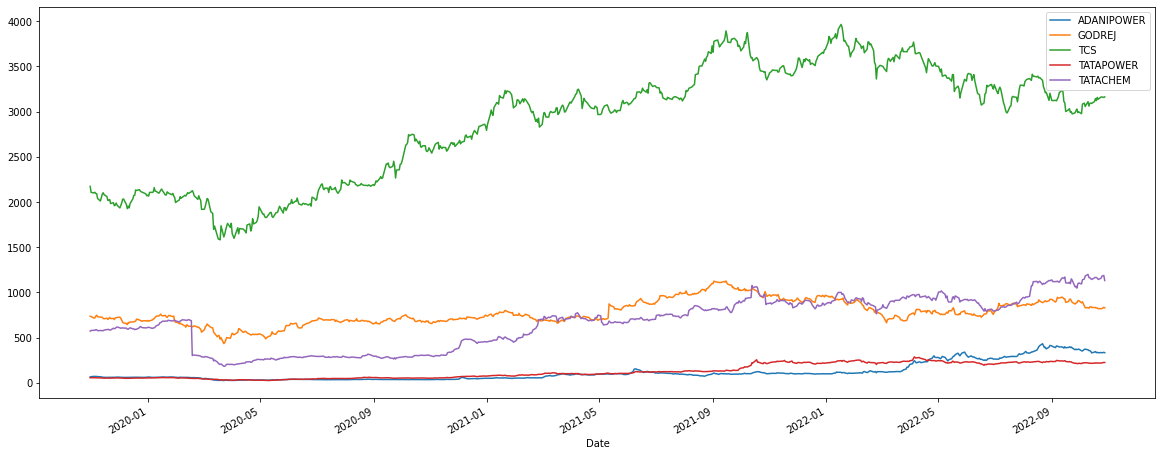

In [17]:
maindf.plot()

#Calculating Returns

**We are making return calculations as percentage change in closing price of the stock over the previous days closing price**

In [18]:
ret=maindf.pct_change()

In [19]:
ret.head()

,ADANIPOWER,GODREJ,TCS,TATAPOWER,TATACHEM
Date,,,,,
2019-10-31 00:00:00+05:30,NaN,NaN,NaN,NaN,NaN
2019-11-01 00:00:00+05:30,0.028009,-0.003107,-0.030291,0.003373,0.012684
2019-11-04 00:00:00+05:30,0.054492,-0.023101,-0.003157,0.003361,0.001733
2019-11-05 00:00:00+05:30,-0.023743,0.000694,0.003601,-0.016750,0.001573
2019-11-06 00:00:00+05:30,0.017167,0.027789,-0.006063,0.003407,0.010521


### Portfolio returns is the weighted sum of returns of the assets in the portfolio

Initializing Random Weights which we will be optimizing later on

In [20]:
weights=[0.3,0.3,0.2,0.1,0.1]

In [21]:
ret_pf=ret.dot(weights)
ret_pf.head()

Date
2019-10-31 00:00:00+05:30         NaN
2019-11-01 00:00:00+05:30    0.003018
2019-11-04 00:00:00+05:30    0.009295
2019-11-05 00:00:00+05:30   -0.007712
2019-11-06 00:00:00+05:30    0.013667
dtype: float64

The above is the daily returns we got from our investments in simple terms , if i invested Rs. 100000  as per above weights in my portfolio the following will be the value of it everyday as per our calculation

In [22]:
ret_pf*100000

Date
2019-10-31 00:00:00+05:30            NaN
2019-11-01 00:00:00+05:30     301.809430
2019-11-04 00:00:00+05:30     929.511034
2019-11-05 00:00:00+05:30    -771.249709
2019-11-06 00:00:00+05:30    1366.715320
                                ...     
2022-10-21 00:00:00+05:30   -1197.747320
2022-10-24 00:00:00+05:30     593.430601
2022-10-25 00:00:00+05:30      23.991977
2022-10-27 00:00:00+05:30    1258.802397
2022-10-28 00:00:00+05:30   -1042.361809
Length: 745, dtype: float64

The above is indicative of profits earned and lost

# Understanding Risks

Steps:

1. Covariance Matrix Calculation
2. Multiply by 252 to annualize Covariance

**Note:** There are 252 Trading Days in a Year

3. Calculate Portfolio Variance ( Portfolio * Weights)
4. Take Root of the Result in **3** to get Standard Deviation, This is called Volatility of Portfolio

In [25]:
cov_mat=ret.cov()*252

In [27]:
cov_mat.head()

,ADANIPOWER,GODREJ,TCS,TATAPOWER,TATACHEM
ADANIPOWER,0.358100,0.042288,0.041043,0.102027,0.087382
GODREJ,0.042288,0.120409,0.027805,0.035582,0.038547
TCS,0.041043,0.027805,0.075671,0.031828,0.029019
TATAPOWER,0.102027,0.035582,0.031828,0.198000,0.083141
TATACHEM,0.087382,0.038547,0.029019,0.083141,0.255425


**Diagonal Elements are variance of each asset in our portfolio**

In [33]:
p_v=np.dot(np.dot(np.transpose(weights),cov_mat),weights)

In [34]:
p_vol=np.sqrt(p_v)

In [38]:
print("Variance of Portfolio",p_v)

Variance of Portfolio 0.08640948175680124


In [39]:
print("Volatility of Portfolio(Risk)",p_vol)

Volatility of Portfolio(Risk) 0.29395489748735476


# Modern Portfolio Theory

In [81]:
p_r=[]
p_v=[]
p_w=[]

assets=len(maindf.columns)
nos=10000

individual_rets=maindf.resample('Y').last().pct_change().mean()

In [82]:
for port in range(nos) :
  # Randomly generate weigh combination
  weights = np.random. random(assets)
  # Normalize weight so that they sum to 1
  weights = weights/np.sum(weights)
  p_w.append(weights)
  # Returns are the dot product of individual expected returns of asset and its weights
  returns = np.dot(weights, individual_rets)
  p_r.append(returns)
  volatility = np.sqrt(np.dot(weights.T, np.dot(cov_mat, weights)))
  p_v .append(volatility)

In [83]:
portfolio = {'Returns': p_r,
             'Volatility': p_v}

In [84]:
for counter,symbol in enumerate(maindf.columns.tolist()):
    portfolio[symbol+' weight'] = [weight[counter] for weight in p_w]

In [85]:
df = pd.DataFrame(portfolio)

In [86]:
df.head()

,Returns,Volatility,ADANIPOWER weight,GODREJ weight,TCS weight,TATAPOWER weight,TATACHEM weight
0,0.649370,0.024657,0.377470,0.021553,0.040736,0.135523,0.424718
1,0.450890,0.022415,0.078378,0.080428,0.085597,0.220969,0.534627
2,0.427443,0.016330,0.183562,0.256779,0.360163,0.183597,0.015899
3,0.549119,0.020328,0.255685,0.282470,0.000337,0.231909,0.229599
4,0.590635,0.019519,0.210640,0.138593,0.148140,0.364008,0.138619


In [88]:
column_order = ['Returns', 'Volatility'] + [stock+' weight' for stock in maindf.columns.tolist()]

In [89]:
df = df[column_order]

In [90]:
df.head()

,Returns,Volatility,ADANIPOWER weight,GODREJ weight,TCS weight,TATAPOWER weight,TATACHEM weight
0,0.649370,0.024657,0.377470,0.021553,0.040736,0.135523,0.424718
1,0.450890,0.022415,0.078378,0.080428,0.085597,0.220969,0.534627
2,0.427443,0.016330,0.183562,0.256779,0.360163,0.183597,0.015899
3,0.549119,0.020328,0.255685,0.282470,0.000337,0.231909,0.229599
4,0.590635,0.019519,0.210640,0.138593,0.148140,0.364008,0.138619


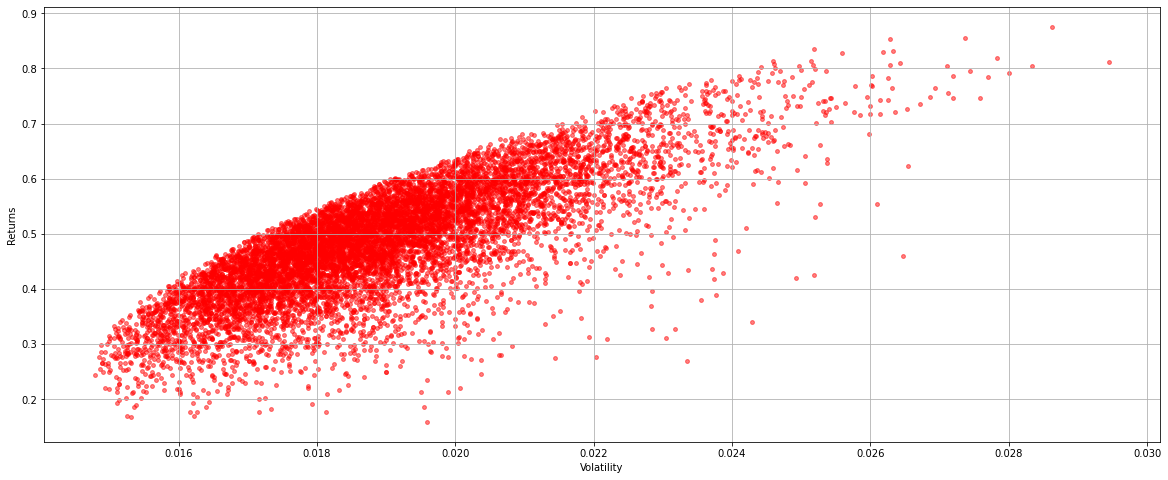

In [92]:
df.plot.scatter(x='Volatility',y='Returns',marker='o',color='r',s=15,alpha=0.5,grid=True,figsize=[20,8])

# Optimizing the Portfolios

1. Find Minimum Volatility
2. Highest Sharpe Ratio
3. Find Portfolio with Highest Sortino Ratio 
4. Max Drawdowns
5. Calmar Ratio

In [95]:
min_vol=df.iloc[df['Volatility'].idxmin()]
min_vol

Returns              0.244716
Volatility           0.014790
ADANIPOWER weight    0.004829
GODREJ weight        0.312414
TCS weight           0.501128
TATAPOWER weight     0.143530
TATACHEM weight      0.038099
Name: 5050, dtype: float64

In [97]:
risk_factor=0.01

optimal_risk_p=df.iloc[((df['Returns']-risk_factor)/df['Volatility']).idxmax()]

In [98]:
optimal_risk_p

Returns              0.835809
Volatility           0.025193
ADANIPOWER weight    0.451533
GODREJ weight        0.047613
TCS weight           0.058806
TATAPOWER weight     0.439153
TATACHEM weight      0.002895
Name: 9886, dtype: float64

In [99]:
ret

,ADANIPOWER,GODREJ,TCS,TATAPOWER,TATACHEM
Date,,,,,
2019-10-31 00:00:00+05:30,NaN,NaN,NaN,NaN,NaN
2019-11-01 00:00:00+05:30,0.028009,-0.003107,-0.030291,0.003373,0.012684
2019-11-04 00:00:00+05:30,0.054492,-0.023101,-0.003157,0.003361,0.001733
2019-11-05 00:00:00+05:30,-0.023743,0.000694,0.003601,-0.016750,0.001573
2019-11-06 00:00:00+05:30,0.017167,0.027789,-0.006063,0.003407,0.010521
...,...,...,...,...,...
2022-10-21 00:00:00+05:30,-0.018467,-0.009719,-0.006303,-0.009964,-0.012650
2022-10-24 00:00:00+05:30,0.010084,0.000061,0.007745,0.001830,0.011587
2022-10-25 00:00:00+05:30,-0.009537,0.000853,0.000127,0.007534,0.020661


In [100]:
ret_df=ret

In [101]:
ret_df['Port']=ret_df.mean(axis=1)

,ADANIPOWER,GODREJ,TCS,TATAPOWER,TATACHEM,Port
Date,,,,,,
2022-10-28 00:00:00+05:30,5.046177,1.127416,1.455749,3.99796,1.977967,2.804523


In [103]:
N = 252
rf =0.01

Text(0, 0.5, 'Sortino Ratio')

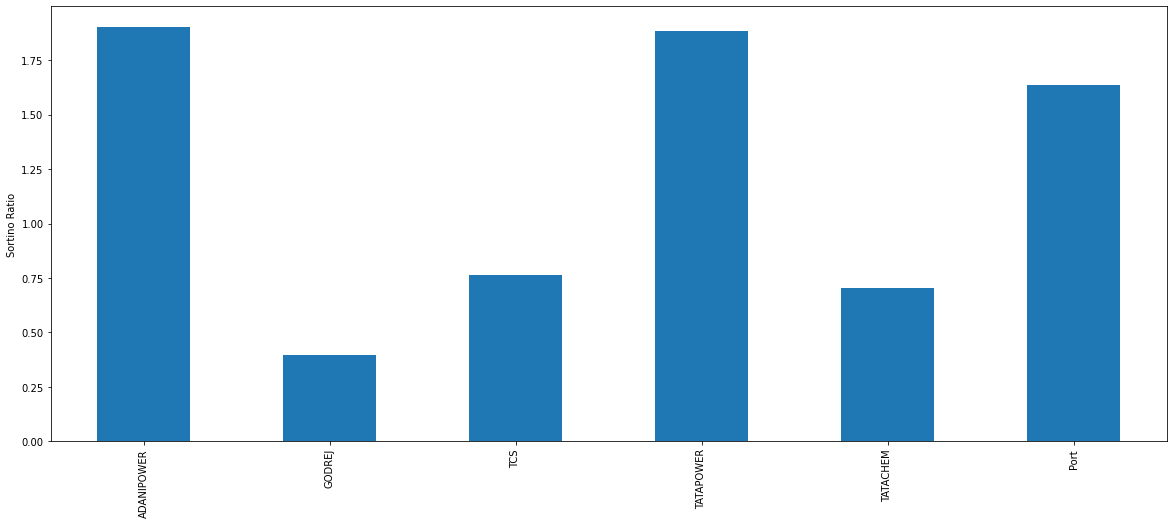

In [104]:
def sortino_ratio(series, N,rf):
    mean = series.mean() * N -rf
    std_neg = series[series<0].std()*np.sqrt(N)
    return mean/std_neg


sortinos = ret_df.apply(sortino_ratio, args=(N,rf,), axis=0 )
sortinos.plot.bar()
plt.ylabel('Sortino Ratio')

Text(0, 0.5, 'Expected Returns')

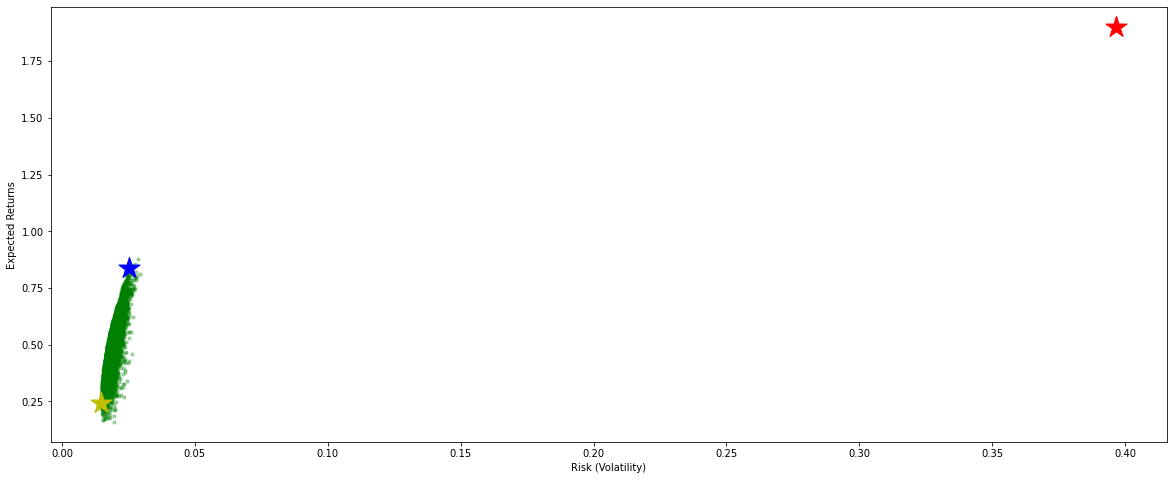

In [110]:
plt.subplots(figsize=(20,8))
plt.scatter(df['Volatility'],df['Returns'],marker='o',s=10,alpha=0.3,color='green')
plt.scatter(min_vol[1],min_vol[0],color='y',marker='*',s=500)
plt.scatter(optimal_risk_p[1],optimal_risk_p[0],color='b',marker='*',s=500)
plt.scatter(sortinos[1],sortinos[0],color='r',marker='*',s=500)
plt.xlabel("Risk (Volatility)")
plt.ylabel("Expected Returns")

Max Draw Downs : Number closer to zero as preferable

Text(0, 0.5, 'Max Drawdown')

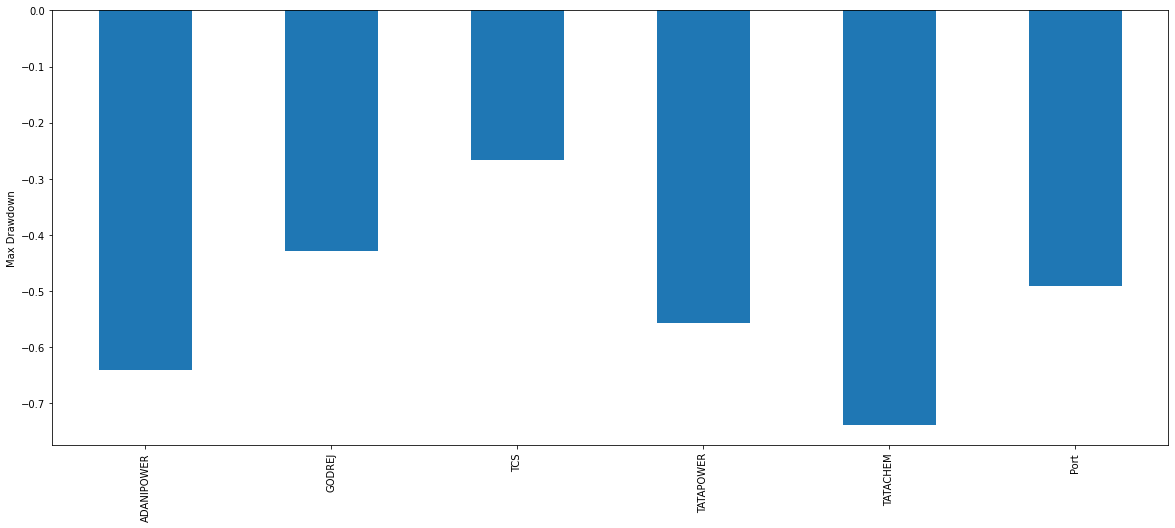

In [106]:
def max_drawdown(return_series):
    comp_ret = (return_series+1).cumprod()
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret/peak)-1
    return dd.min()


max_drawdowns = ret_df.apply(max_drawdown,axis=0)
max_drawdowns.plot.bar()
plt.ylabel('Max Drawdown')

# Calmar Ratio

Higher values are the best

Text(0, 0.5, 'Calmar ratio')

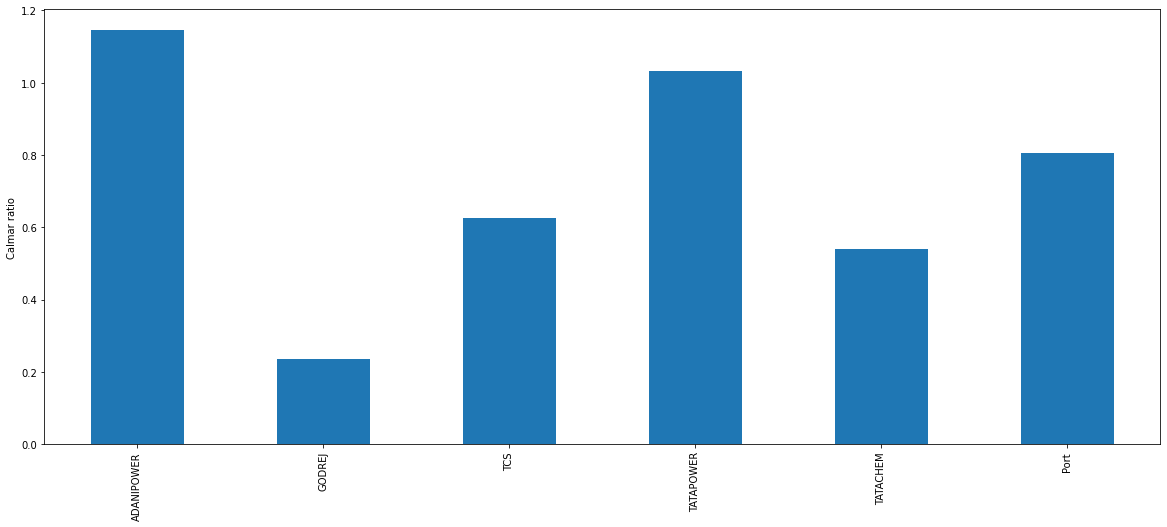

In [107]:
calmars = ret_df.mean()*255/abs(max_drawdowns)

calmars.plot.bar()
plt.ylabel('Calmar ratio')